In [57]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [58]:
def load_image(image_path):
    image = Image.open(image_path)
    img_array = np.array(image)
    return img_array

In [63]:
image_paths = ['images/Tartaglia.jpg', 
              'images/Gojo - Six Eyes.jpg', 
              'images/Vivy - Eyes.jpg']

images = [load_image(path) for path in image_paths]
images[2] = np.rot90(images[2])

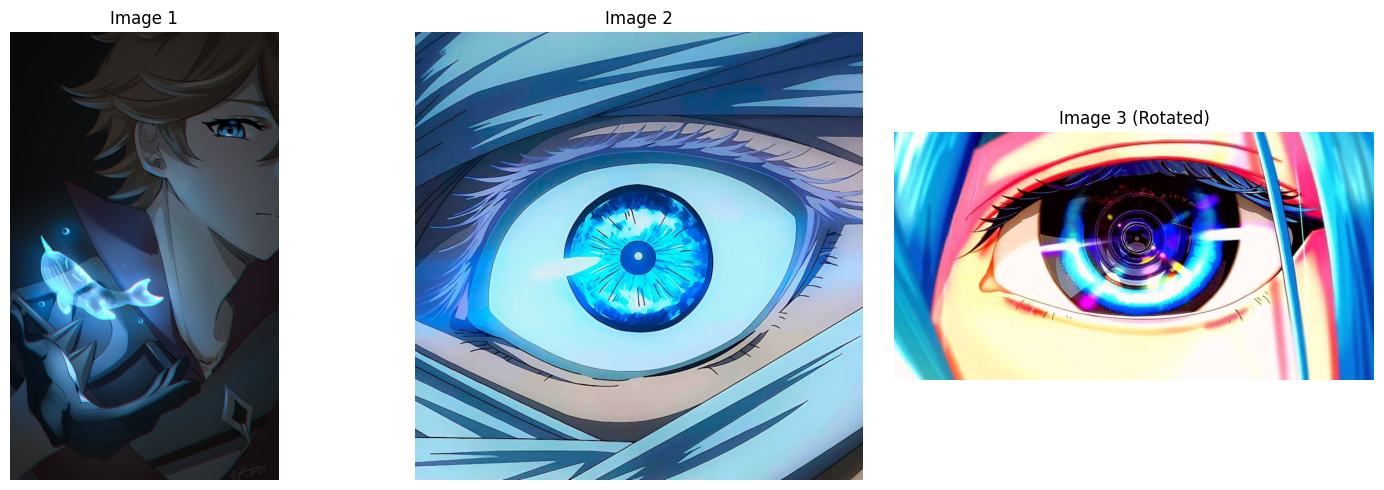

In [64]:
plt.figure(figsize=(15, 5))
for i, img in enumerate(images):
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(f'Image {i+1}' + (' (Rotated)' if i == 2 else ''))
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Extracting RGB Channels**

In [66]:
def extract_channels(img):
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]
    return R, G, B

channels = [extract_channels(img) for img in images]

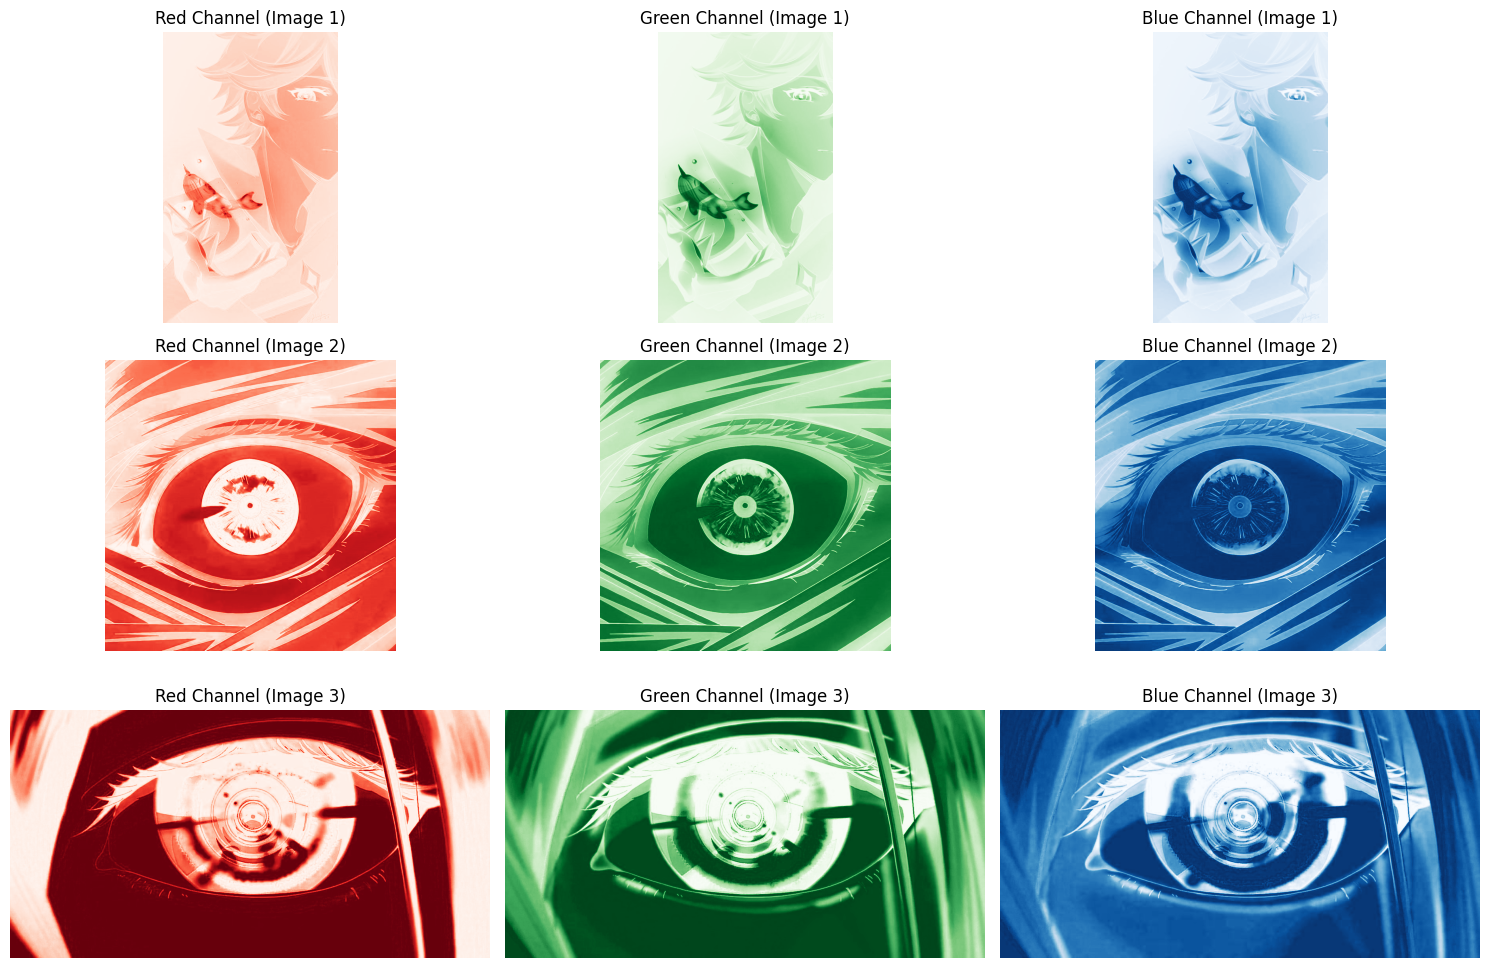

In [67]:
plt.figure(figsize=(15,10))
for i, (R, G, B) in enumerate(channels):
    plt.subplot(3, 3, i*3+1)
    plt.imshow(R, cmap='Reds')
    plt.title(f'Red Channel (Image {i+1})')
    plt.axis('off')

    plt.subplot(3, 3, i*3+2)
    plt.imshow(G, cmap='Greens')
    plt.title(f'Green Channel (Image {i+1})')
    plt.axis('off')

    plt.subplot(3, 3, i*3+3)
    plt.imshow(B, cmap='Blues')
    plt.title(f'Blue Channel (Image {i+1})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Converting to Grayscale**

In [68]:
def convert_to_grayscale(R, G, B):
    return 0.299 * R + 0.587 * G + 0.114 * B

grayscale_images = [convert_to_grayscale(R, G, B) for R, G, B in channels]

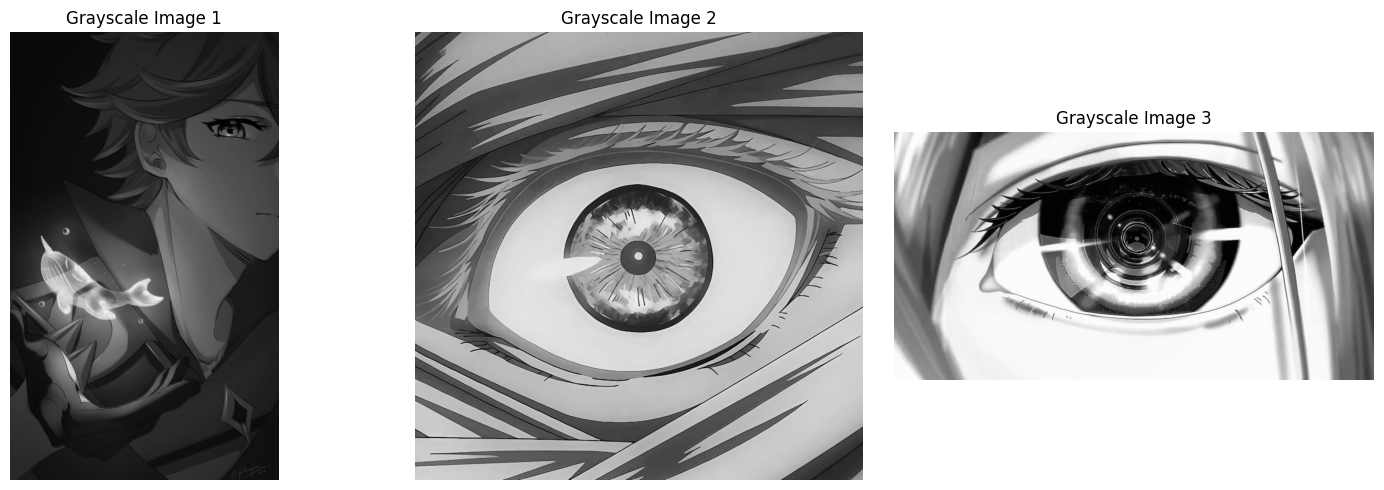

In [69]:
plt.figure(figsize=(15,5))
for i, img in enumerate(grayscale_images):
    plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Grayscale Image {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Applying Convolution with Kernel**

In [70]:
def apply_kernel(img, kernel):
    k_height, k_width = kernel.shape
    img_height, img_width = img.shape

    pad_h = k_height // 2
    pad_w = k_width // 2
    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    output_img = np.zeros(img.shape)

    for i in range(img_height):
        for j in range(img_width):
            output_img[i, j] = np.sum(kernel * padded_img[i:i+k_height, j:j+k_width])

    return output_img

In [71]:
kernels = [
    np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),
    np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]]),
    np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    np.array([[1, 1, 1], [1, -7, 1], [1, 1, 1]])
]

In [72]:
kernel_results = [[apply_kernel(img, kernel) for kernel in kernels] for img in grayscale_images]

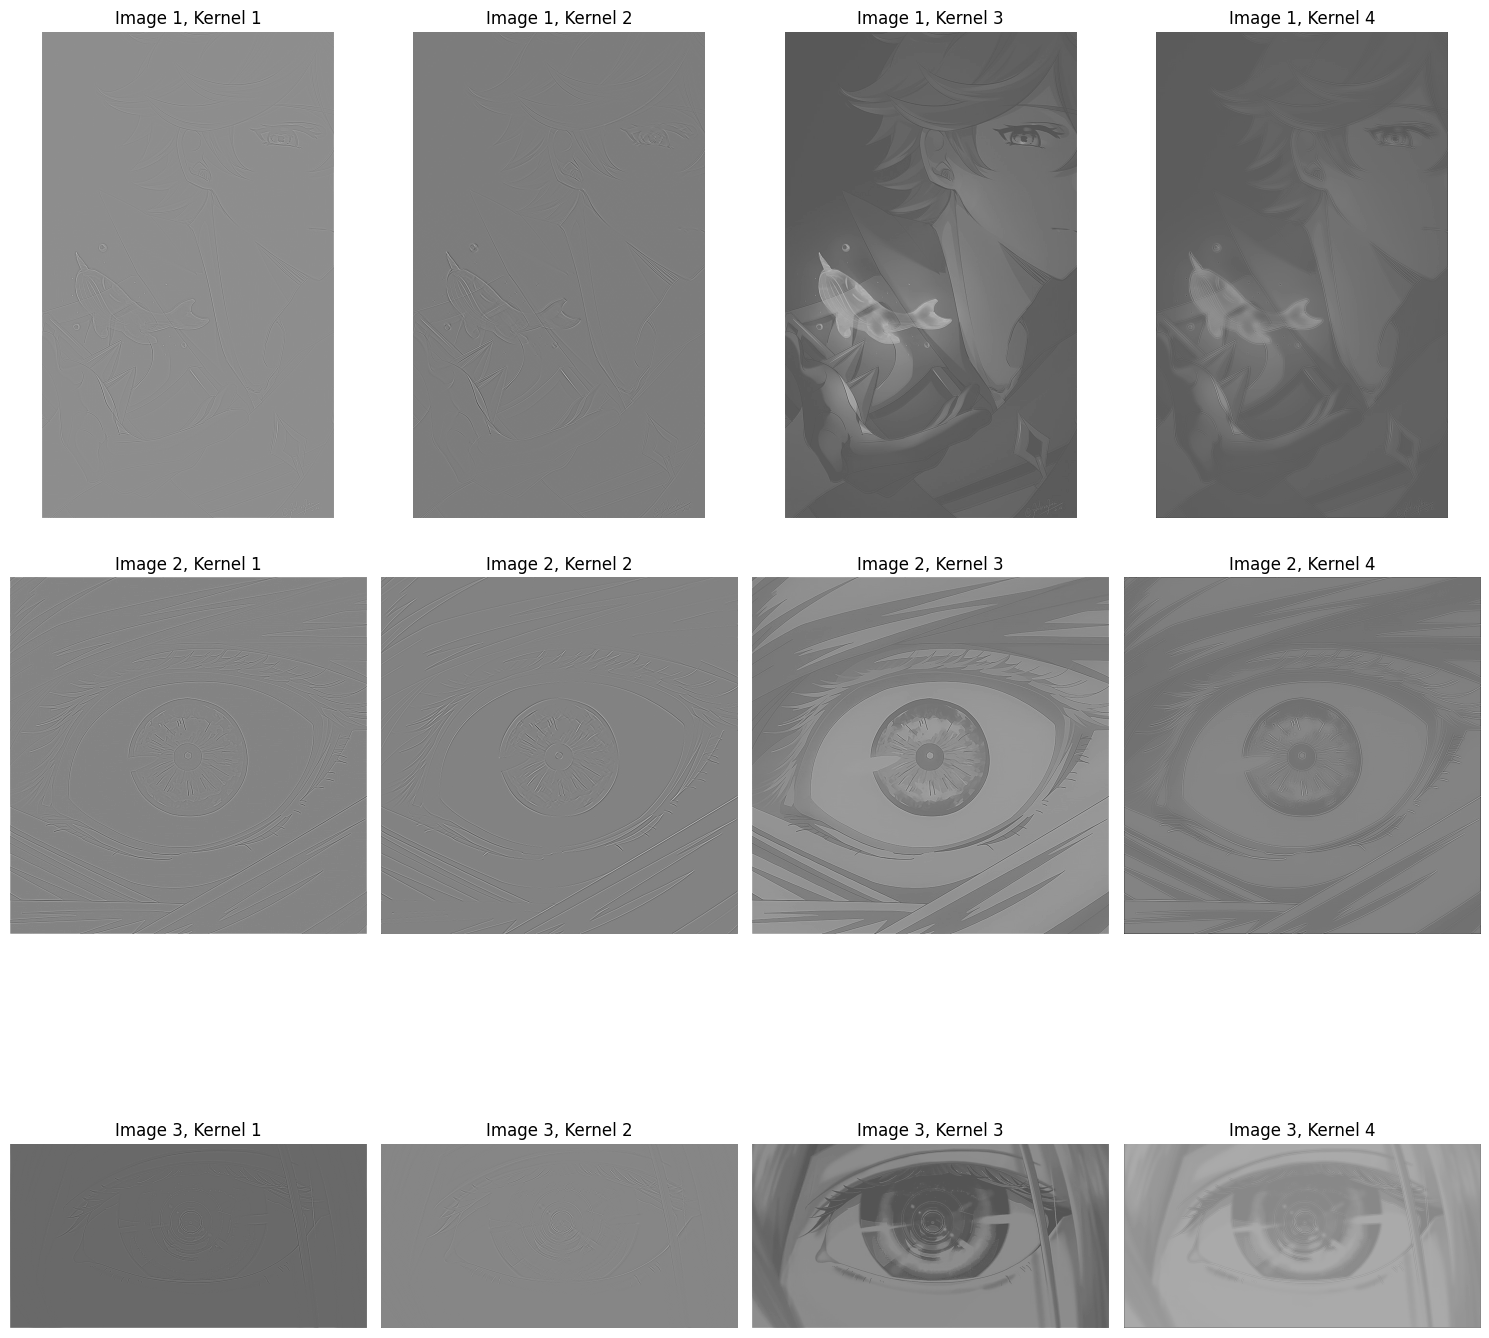

In [73]:
plt.figure(figsize=(15, 15))
for i in range(3):
    for j in range(4):
        plt.subplot(3, 4, i*4 + j + 1)
        plt.imshow(kernel_results[i][j], cmap='gray')
        plt.title(f'Image {i+1}, Kernel {j+1}')
        plt.axis('off')

plt.tight_layout()
plt.show()

# **Pooling (Average and Max)**

In [74]:
def pooling(img, size=2, pool_type='avg'):
    new_height = img.shape[0] // size
    new_width = img.shape[1] // size

    pooled_img = np.zeros((new_height, new_width))

    for i in range(new_height):
        for j in range(new_width):
            region = img[i*size:(i+1)*size, j*size:(j+1)*size]
            if pool_type == 'avg':
                pooled_img[i, j] = np.mean(region)
            elif pool_type == 'max':
                pooled_img[i, j] = np.max(region)

    return pooled_img

In [75]:
avg_pooled_images = [pooling(img, size=2, pool_type='avg') for img in grayscale_images]
max_pooled_images = [pooling(img, size=2, pool_type='max') for img in grayscale_images]

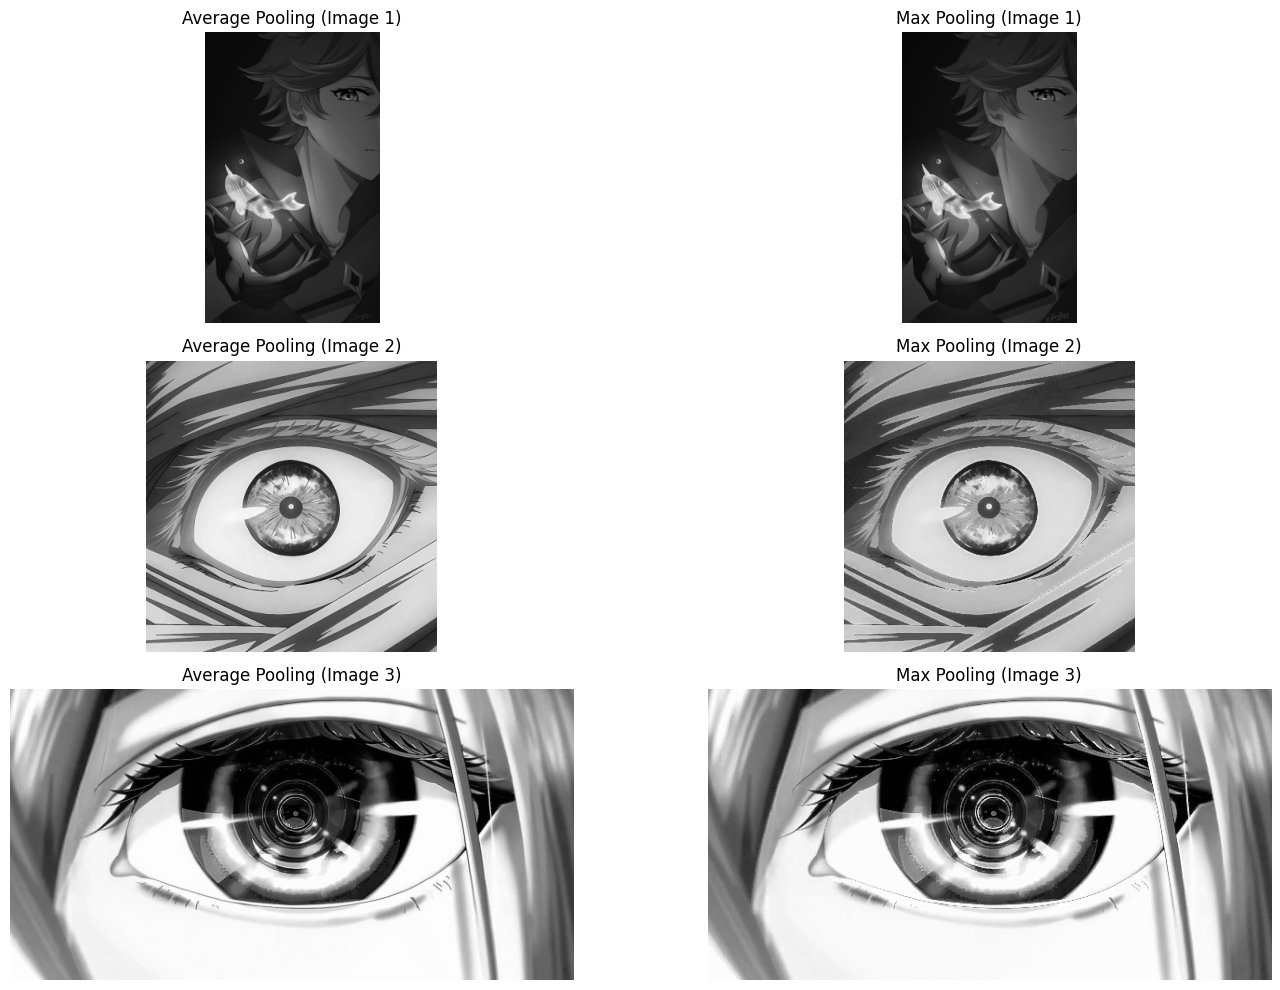

In [76]:
plt.figure(figsize=(15,10))
for i in range(3):
    plt.subplot(3, 2, 2*i+1)
    plt.imshow(avg_pooled_images[i], cmap='gray')
    plt.title(f'Average Pooling (Image {i+1})')
    plt.axis('off')

    plt.subplot(3, 2, 2*i+2)
    plt.imshow(max_pooled_images[i], cmap='gray')
    plt.title(f'Max Pooling (Image {i+1})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Flattening the Image**

In [56]:
def flatten(img):
    return img.flatten()

flattened_images = [flatten(img) for img in grayscale_images]

for i, flattened in enumerate(flattened_images):
    print(f"Flattened shape for Image {i+1}: {flattened.shape}")

Flattened shape for Image 1: (901110,)
Flattened shape for Image 2: (541696,)
Flattened shape for Image 3: (758712,)
